In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb # training:test=1:1

In [16]:
(X_train, y_train), (X_test, y_test) = imdb.load_data() # num_words = limit the number of words

print('training data : {}'.format(len(X_train)))
print('test data : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('categories : {}'.format(num_classes))

training data : 25000
test data : 25000
categories : 2


In [17]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("frequency for each label:")
print(np.asarray((unique_elements, counts_elements)))

frequency for each label:
[[    0     1]
 [12500 12500]]


In [18]:
print('the first review of the training samples :',X_train[0])
print('the first label of the training samples :',y_train[0]) # 0 for negative, 1 for positive

the first review of the training samples : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 17

In [19]:
word_to_index = imdb.get_word_index() # download the word index
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key # index+3 (rule of the data set)

In [47]:
# Vocabulary size
len(word_to_index)

88584

In [20]:
print('frequency top 1 : {}'.format(index_to_word[4])) # 1+3

frequency top 1 : the


In [21]:
print('frequency top 3938 : {}'.format(index_to_word[3941])) # 3938+3

frequency top 3938 : suited


In [22]:
# Integer to words for the first sample
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

the maximum length of the reviews : 2494
the average length of the reviews : 238.71364


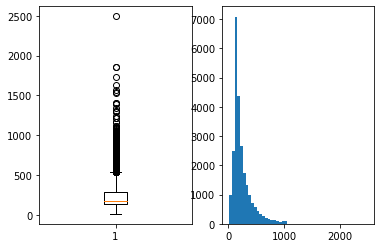

In [23]:
# Check the length of each sample
reviews_length = [len(review) for review in X_train]

print('the maximum length of the reviews : {}'.format(np.max(reviews_length)))
print('the average length of the reviews : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [24]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('Ratio of reviews with length less than or equal to %s: %s'%(max_len, (count / len(nested_list))*100))

In [25]:
below_threshold_len(500, X_train)

Ratio of reviews with length less than or equal to 500: 91.56800000000001


In [26]:
# Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [41]:
# Modeling 1. Simple Recurrent Neural Network
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [42]:
embedding_dim = 100 # embedding dimension
hidden_units = 128 # number of hidden neurons

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('Simple_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
# use different validating data from evaluating data

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.6450 - acc: 0.6066
Epoch 00001: val_acc improved from -inf to 0.77900, saving model to Simple_model.h5
313/313 [==============================] - 69s 218ms/step - loss: 0.6450 - acc: 0.6066 - val_loss: 0.4832 - val_acc: 0.7790
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.4278 - acc: 0.8127
Epoch 00002: val_acc improved from 0.77900 to 0.84060, saving model to Simple_model.h5
313/313 [==============================] - 70s 224ms/step - loss: 0.4278 - acc: 0.8127 - val_loss: 0.3934 - val_acc: 0.8406
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.4453 - acc: 0.8157
Epoch 00003: val_acc did not improve from 0.84060
313/313 [==============================] - 67s 214ms/step - loss: 0.4453 - acc: 0.8157 - val_loss: 0.4509 - val_acc: 0.7920
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.3381 - acc: 0.8624
Epoch 00004: val_acc did not improve from 0

In [44]:
# Model Evaluation
Simple_loaded_model = load_model('Simple_model.h5')
print("\n test accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 30s 38ms/step - loss: 0.4477 - acc: 0.7965

 test accuracy: 0.7965


In [11]:
# Modeling 2. Gated Recurrent Unit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding # Gated recurrent units
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [12]:
embedding_dim = 100 # embedding dimension
hidden_units = 128 # number of hidden neurons

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
# use different validating data from evaluating data

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.4890 - acc: 0.7574
Epoch 00001: val_acc improved from -inf to 0.83580, saving model to GRU_model.h5
313/313 [==============================] - 215s 675ms/step - loss: 0.4890 - acc: 0.7574 - val_loss: 0.3777 - val_acc: 0.8358
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3120 - acc: 0.8786
Epoch 00002: val_acc improved from 0.83580 to 0.85700, saving model to GRU_model.h5
313/313 [==============================] - 228s 726ms/step - loss: 0.3120 - acc: 0.8786 - val_loss: 0.3483 - val_acc: 0.8570
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2556 - acc: 0.9039
Epoch 00003: val_acc improved from 0.85700 to 0.87740, saving model to GRU_model.h5
313/313 [==============================] - 223s 714ms/step - loss: 0.2556 - acc: 0.9039 - val_loss: 0.3463 - val_acc: 0.8774
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2022 - acc: 0.9247
Epoch 00004:

In [15]:
# Model Evaluation
GRU_loaded_model = load_model('GRU_model.h5')
print("\n test accuracy: %.4f" % (GRU_loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 68s 86ms/step - loss: 0.2937 - acc: 0.8830

 test accuracy: 0.8830


In [28]:
# Modeling 3. 1D Convolution Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [45]:
embedding_dim = 128 # embedding dimension
dropout_ratio = 0.3 # dropout ratio
num_filters = 128 # number of filters(kernels)
kernel_size = 3 # size of filters(kernels)
hidden_units = 128 # number of hidden neurons

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D()) # max pooling
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], validation_split=0.2)
# use different validating data from evaluating data

Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 0.4339 - acc: 0.7788
Epoch 00001: val_acc improved from -inf to 0.88040, saving model to CNN_model.h5
625/625 [==============================] - 71s 113ms/step - loss: 0.4339 - acc: 0.7788 - val_loss: 0.2889 - val_acc: 0.8804
Epoch 2/20
625/625 [==============================] - ETA: 0s - loss: 0.2204 - acc: 0.9131
Epoch 00002: val_acc improved from 0.88040 to 0.89080, saving model to CNN_model.h5
625/625 [==============================] - 63s 101ms/step - loss: 0.2204 - acc: 0.9131 - val_loss: 0.2626 - val_acc: 0.8908
Epoch 3/20
625/625 [==============================] - ETA: 0s - loss: 0.1213 - acc: 0.9575
Epoch 00003: val_acc did not improve from 0.89080
625/625 [==============================] - 63s 101ms/step - loss: 0.1213 - acc: 0.9575 - val_loss: 0.2898 - val_acc: 0.8888
Epoch 4/20
625/625 [==============================] - ETA: 0s - loss: 0.0575 - acc: 0.9801
Epoch 00004: val_acc did not improve from 0.89080

In [46]:
CNN_loaded_model = load_model('CNN_model.h5')
print("\n test accuracy: %.4f" % (CNN_loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 11s 13ms/step - loss: 0.2672 - acc: 0.8885

 test accuracy: 0.8885


In [31]:
# Modeling 4. Multi-Kernel Convolution Neural Network
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [36]:
embedding_dim = 128 # embedding dimension
dropout_ratio = (0.3, 0.5) # dropout ratio
num_filters = 128 # number of filters(kernels)
hidden_units = 128 # number of hidden neurons

# Define model input and embedding layer
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z) # dropout ratio = 0.3

In [37]:
conv_blocks = []

for sz in [3, 4, 5]: # kernel size = 3, 4, 5
    conv = Conv1D(filters = num_filters, # 128 for each kernel
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z) # strides = 1
    conv = GlobalMaxPooling1D()(conv) # max pooling
    conv_blocks.append(conv)

In [38]:
# Concatenate the results after max pooling and send it to hidden layers
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z) # dropout ratio = 0.5
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('Multi_CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=2, callbacks=[es, mc])

Epoch 1/20

Epoch 00001: val_acc improved from -inf to 0.86340, saving model to Multi_CNN_model.h5
313/313 - 159s - loss: 0.5237 - acc: 0.7117 - val_loss: 0.3261 - val_acc: 0.8634 - 159s/epoch - 509ms/step
Epoch 2/20

Epoch 00002: val_acc improved from 0.86340 to 0.88680, saving model to Multi_CNN_model.h5
313/313 - 151s - loss: 0.2985 - acc: 0.8749 - val_loss: 0.2678 - val_acc: 0.8868 - 151s/epoch - 482ms/step
Epoch 3/20

Epoch 00003: val_acc improved from 0.88680 to 0.89820, saving model to Multi_CNN_model.h5
313/313 - 157s - loss: 0.2014 - acc: 0.9223 - val_loss: 0.2626 - val_acc: 0.8982 - 157s/epoch - 501ms/step
Epoch 4/20

Epoch 00004: val_acc did not improve from 0.89820
313/313 - 162s - loss: 0.1406 - acc: 0.9474 - val_loss: 0.3035 - val_acc: 0.8902 - 162s/epoch - 517ms/step
Epoch 5/20

Epoch 00005: val_acc did not improve from 0.89820
313/313 - 162s - loss: 0.0906 - acc: 0.9668 - val_loss: 0.3480 - val_acc: 0.8862 - 162s/epoch - 519ms/step
Epoch 6/20

Epoch 00006: val_acc did n

In [51]:
Multi_CNN_loaded_model = load_model('Multi_CNN_model.h5')
print("\n test accuracy: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 37s 47ms/step - loss: 0.2841 - acc: 0.8836

 test accuracy: 0.8836


In [48]:
# The model using 1D CNN shows the highest accuracy
# Let's make a make a Sentiment Predictor with this model

import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower() # Remain only alphabets and numbers, Uppercase to lowercase
  encoded = []

  for word in new_sentence.split(): # Tokenization
    try :
      if word_to_index[word] <= 10000: # Vocabulary size <= 10000
        encoded.append(word_to_index[word]+3)
      else:
        encoded.append(2) # If vocabulary > 10000, move to <unk> token
    except KeyError:
      encoded.append(2) # OOV (Out of Vocabulary) to <unk> token

  pad_sequence = pad_sequences([encoded], maxlen=max_len) # Padding
  score = float(CNN_loaded_model.predict(pad_sequence)) # Prediction with the model

  if(score > 0.5): # Threshold = 0.5
    print("Positive review with the probability of {:.2f}%".format(score * 100))
  else:
    print("Negative review with the probability of {:.2f}%".format((1 - score) * 100))

In [49]:
test_input1 = "The story is boring and dull, I love Mads, but Johnny was born for this role. No Johnny, no more great scores for you. WB, you deserve only 1s for all of your movies. Trying to be as successful as Marvel/Disney, but failing miserably. Worst end of all the HP movies."

sentiment_predict(test_input1)

Negative review with the probability of 99.68%


In [50]:
test_input2 = "Even though it still has a reasonably messy narrative, Fantastic Beasts: The Secrets of Dumbledore is a significant improvement over it's disappointing predecessor that actually remembers to be fun and emotionally satisfying with genuinely magical moments. Eddie Redmayne still has the adorably awkward charm and likeability that make him a consistently great lead. Mads Mikkelsen is definitely the best Grindelwald with a more subtle and restrained evil presence. Jude Law is once again an incredible Dumbledore and Dan Fogler is still a really funny scene stealer. Jessica Williams is an amazing new addition with endless charisma and is instantly likeable. David Yates' direction is really good despite having done so many already, still delivering inventive set pieces and great fights. The CG is mostly impressive if a little overused. The music by James Newton Howard is excellent, adding to the overall atmosphere with effective callbacks and heartwarming whimsy."

sentiment_predict(test_input2)

Positive review with the probability of 99.65%
